In [18]:
import numpy as np
import pandas as pd
import xarray as xr

from salishsea_tools import places

%matplotlib inline

In [11]:
atmos   = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
(iY, iX) = places.PLACES['Sand Heads']['wind grid ji'] 

In [36]:
u_wind2015 = atmos.u_wind.sel(time ='2015', gridX=iX, gridY=iY, method='nearest')
v_wind2015 = atmos.v_wind.sel(time ='2015', gridX=iX, gridY=iY, method='nearest')
u_wind2016 = atmos.u_wind.sel(time ='2016', gridX=iX, gridY=iY, method='nearest')
v_wind2016 = atmos.v_wind.sel(time ='2016', gridX=iX, gridY=iY, method='nearest')

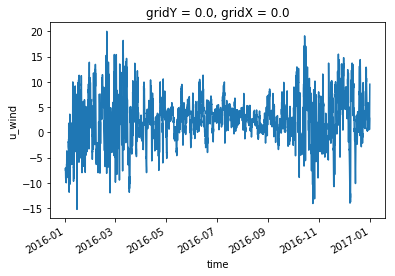

In [37]:
u_wind2016.plot()

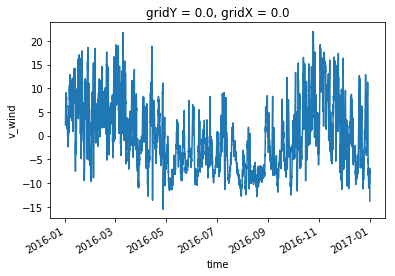

In [38]:
v_wind2016.plot()

In [39]:
along_strait2015 = np.cos(np.deg2rad(29))*v_wind2015 + np.sin(np.deg2rad(29))*u_wind2015
along_strait2016 = np.cos(np.deg2rad(29))*v_wind2016 + np.sin(np.deg2rad(29))*u_wind2016

In [42]:
along_strait = xr.concat([along_strait2015, along_strait2016], dim='time')
day_avg_wind = along_strait.resample(time='1D').mean()
day_avg_wind_pd = day_avg_wind.to_dataframe(name='wind')
day_avg_wind_pd = day_avg_wind_pd.drop('gridY', 1)
day_avg_wind_pd = day_avg_wind_pd.drop('gridX', 1)

/home/sallen/anaconda/envs/erddap-issue/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


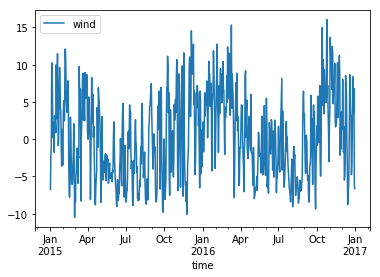

In [43]:
day_avg_wind_pd.plot()

In [44]:
low_pass_wind = pd.rolling_mean(day_avg_wind_pd, 4, center=True)

/home/sallen/anaconda/envs/erddap-issue/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=4,center=True).mean()
  """Entry point for launching an IPython kernel.


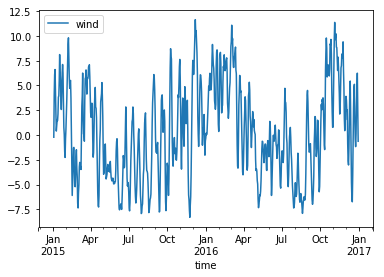

In [45]:
low_pass_wind.plot()
low_pass_wind.to_csv('low_pass_wind.csv')